<a href="https://colab.research.google.com/github/francescodilucia8/pytorch_exp/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Create a Module that inherits nn.MOdule
class Model(nn.Module):
  #Input Layer(4 features of the flower)-->
  #Hidden layer 1(n1)-->
  #Hidden layer 2(n2)-->
  #Output(3 classes of Iris flower)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate our nn.Module
    self.fc1= nn.Linear(in_features,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out= nn.Linear(h2,out_features)


  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)

    return x

In [3]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model=Model()

In [4]:
import pandas as pd #for data manipulation. python library for datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df=pd.read_csv(url)

In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)

<ipython-input-7-c66242885670>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


In [8]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
#Train Test Split; set X and y
X=my_df.drop('species', axis=1)
y=my_df['species']


In [10]:
#convert these to numpy arrays
X=X.values
y=y.values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [12]:
#set the ctiterion of model to measure the error, how far off the predictions are from the data
criterion=nn.CrossEntropyLoss()

In [13]:
#Choose Optimizer and lr(learning rate)
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [14]:
#train our model
#Epochs? one run trhough all the training data in our network
epochs=100
losses=[]
for i in range(epochs):
  #go forward and get a prediction
  y_pred=model.forward(X_train)
  #Measure the loss/error
  loss=criterion(y_pred,y_train)
  #keep track of our losses
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1271404027938843
Epoch: 10 Loss: 1.0265334844589233
Epoch: 20 Loss: 0.8488813638687134
Epoch: 30 Loss: 0.6080433130264282
Epoch: 40 Loss: 0.4112132489681244
Epoch: 50 Loss: 0.27953168749809265
Epoch: 60 Loss: 0.19093765318393707
Epoch: 70 Loss: 0.13570383191108704
Epoch: 80 Loss: 0.10152756422758102
Epoch: 90 Loss: 0.08188969641923904


Text(0.5, 0, 'Epoch')

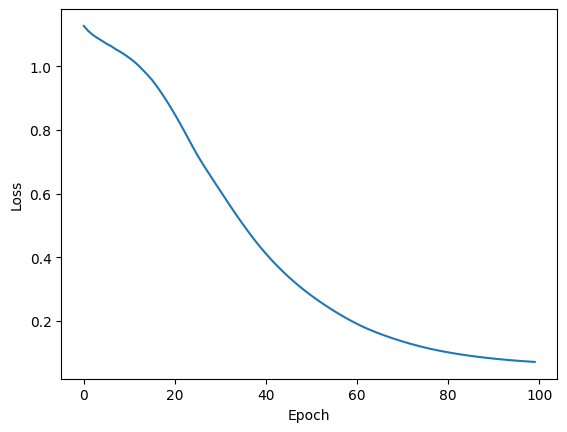

In [15]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [24]:
#Evaluate model on test Dataset
with torch.no_grad(): #basically turn off backpropagation
  y_eval=model.forward(X_test) #X_test are features from our testset and y_eval will be our predictions
  loss=criterion(y_eval,y_test)
  print(f'Loss: {loss}')


Loss: 0.06767402589321136


In [30]:
correct=0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'{i+1}. {str(y_val)} {y_test[i]}') # will tell us what type of flower our network think it is.
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'Accuracy: {round(correct/len(y_test),3)}')
print(f'Correct: {correct}')
print(f'Wrong: {len(y_test)-correct}')

1. tensor([-3.2316,  5.1768,  1.1633]) 1
2. tensor([-6.5689,  4.1178,  7.7926]) 2
3. tensor([ 6.0058, -3.5290, -4.3792]) 0
4. tensor([-7.1934,  5.2945,  7.4844]) 2
5. tensor([-8.0717,  4.1888, 10.1525]) 2
6. tensor([ 5.0375, -2.6439, -3.7501]) 0
7. tensor([ 5.1105, -2.7210, -3.7671]) 0
8. tensor([ 5.1312, -2.7403, -3.7847]) 0
9. tensor([ 6.1383, -3.6481, -4.4672]) 0
10. tensor([-7.4351,  4.6244,  8.6356]) 2
11. tensor([-3.4298,  5.3625,  1.2906]) 1
12. tensor([-8.2225,  4.5336, 10.0112]) 2
13. tensor([-8.0275,  5.0892,  9.0941]) 2
14. tensor([-6.6377,  5.5228,  6.3703]) 2
15. tensor([ 5.3159, -2.9059, -3.9051]) 0
16. tensor([-4.2641,  5.5333,  2.5021]) 1
17. tensor([-6.6239,  4.8075,  7.1391]) 2
18. tensor([-8.1612,  4.2404, 10.2507]) 2
19. tensor([ 4.9500, -2.5755, -3.6540]) 0
20. tensor([-4.5359,  4.8134,  3.7398]) 1
21. tensor([-7.8396,  3.8137, 10.1786]) 2
22. tensor([ 5.8569, -3.3952, -4.2801]) 0
23. tensor([ 5.8823, -3.4157, -4.3135]) 0
24. tensor([-3.2144,  5.1676,  1.1320]) 1
2

In [31]:
#try with new data
new_data=torch.tensor([5.6,3.7,1.2,0.2])
with torch.no_grad():
  print(model.forward(new_data))
  print(f'Predicted Class: {model.forward(new_data).argmax().item()}')
model.eval()

tensor([ 6.5327, -4.0027, -4.7297])
Predicted Class: 0


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [32]:
#Save our nn.Model
torch.save(model.state_dict(),'iris_model.pt')


In [33]:
#Load a saved model
new_model=Model()
new_model.load_state_dict(torch.load('iris_model.pt'))
new_model.eval()

<ipython-input-33-1668e438760b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)